# PyCity Schools Analysis

* As a whole, schools with higher budgets, did not yield better test results. By contrast, schools with higher spending per student actually (\$645-675) underperformed compared to schools with smaller budgets (<\$585 per student).

* As a whole, smaller and medium sized schools dramatically out-performed large sized schools on passing math performances (89-91% passing vs 67%).

* As a whole, charter schools out-performed the public district schools across all metrics. However, more analysis will be required to glean if the effect is due to school practices or the fact that charter schools tend to serve smaller student populations per school. 
---

In [1]:
%matplotlib notebook

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas Data Frames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset
school_data_complete = pd.merge(student_data, school_data, how="left", on="school_name")
school_data_complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


## District Summary

* Calculate the total number of schools

* Calculate the total number of students

* Calculate the total budget

* Calculate the average math score 

* Calculate the average reading score

* Calculate the overall passing rate (overall average score), i.e. (avg. math score + avg. reading score)/2

* Calculate the percentage of students with a passing math score (70 or greater)

* Calculate the percentage of students with a passing reading score (70 or greater)

* Create a dataframe to hold the above results

* Optional: give the displayed data cleaner formatting

In [3]:
# Calculate the total number of schools
unique_schools_data = school_data_complete.drop_duplicates("school_name")

Total_number_of_schools = unique_schools_data["school_name"].count()

# Calculate the total number of students
## First making sure that there is no duplicate data
unique_students_data = school_data_complete.drop_duplicates(["Student ID"])

Total_number_of_students = unique_students_data["Student ID"].count()

# Calculate the total budget
total_budget = unique_schools_data["budget"].sum()

#Calculate the average math score
average_math_score = unique_students_data["math_score"].mean()

#Calculate the average reading score
average_reading_score = unique_students_data["reading_score"].mean()

#Calculate the overall passing rate (overall average score), i.e. (avg. math score + avg. reading score)/2

#unique_students_data["GPA"] = (unique_students_data["math_score"]+unique_students_data["reading_score"])/2
#overall_passing_percentage = (unique_students_data[unique_students_data["GPA"]>=70]["GPA"].count()/
#                              Total_number_of_students)*100

overall_passing_percentage = (average_math_score+average_reading_score)/2

#Calculate the percentage of students with a passing math score (70 or greater)
passing_math_percentage = (unique_students_data[unique_students_data["math_score"]>=70]["math_score"].count()/
                           Total_number_of_students)*100


#Calculate the percentage of students with a passing reading score (70 or greater)
passing_reading_percentage = (unique_students_data[unique_students_data["reading_score"]>=70]["reading_score"].count()/
                              Total_number_of_students)*100

#Create a dataframe to hold the above results
district_data_series = {"Total Schools":Total_number_of_schools,"Total Student":Total_number_of_students,
                       "Total Budget":total_budget,"Average Math Score":average_math_score,"Average Reading Score":
                        average_reading_score, "% Passing Math":passing_math_percentage, "% Passing Reading":
                       passing_reading_percentage, "% Overall Passing Rate":overall_passing_percentage}


#Optional: give the displayed data cleaner formatting
pd.options.display.float_format = '{:,.2f}'.format

district_summary_df = pd.DataFrame(district_data_series, index = [0])
district_summary_df["Total Budget"] = district_summary_df["Total Budget"].map("${:,.2F}".format) 
district_summary_df["Total Student"] = district_summary_df["Total Student"].map("{:,}".format) 

district_summary_df


,Total Schools,Total Student,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
0,15,"39,170","$24,649,428.00",78.99,81.88,74.98,85.81,80.43


## School Summary

* Create an overview table that summarizes key metrics about each school, including:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per Student Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)
  
* Create a dataframe to hold the above results

In [5]:
#Create an overview table that summarizes key metrics about each school, including:
#School Type & Total School Budget
school_summary_df = unique_schools_data[["school_name","type","budget"]].set_index("school_name")
school_summary_df = school_summary_df.rename(columns= {"type":"School Type", "budget":"Total School Budget"})

#Total Students
Grouped_by_school = school_data_complete.groupby("school_name")
#Grouped_by_school_df = pd.DataFrame(Grouped_by_school["student_name"].count())
#Grouped_by_school_df["School Type"] = [school_summary_df.loc[row,"type"] for row in Grouped_by_school_df.index]

school_summary_df["Total Student"]= Grouped_by_school["student_name"].count()

#Per Student Budget
school_summary_df["Per Student Budget"]= school_summary_df["Total School Budget"]/school_summary_df["Total Student"]

#Average Math Score
school_summary_df["Average Math Score"]= Grouped_by_school["math_score"].mean()
#Average Reading Score
school_summary_df["Average Reading Score"]= Grouped_by_school["reading_score"].mean()

#% Passing Math
school_data_passed_math=school_data_complete[school_data_complete["math_score"]>=70]
school_data_passed_reading=school_data_complete[school_data_complete["reading_score"]>=70]

Grouped_by_school_math_passed = school_data_passed_math.groupby("school_name")
Grouped_by_school_reading_passed = school_data_passed_reading.groupby("school_name")


school_summary_df["% Passing Math"]= (Grouped_by_school_math_passed["math_score"].count()/
                                      school_summary_df["Total Student"])*100

#% Passing Reading
school_summary_df["% Passing Reading"]= (Grouped_by_school_reading_passed["reading_score"].count()/
                                         school_summary_df["Total Student"])*100

#Overall Passing Rate (Average of the above two)
school_summary_df["% Overall Passing Rate"]= (school_summary_df["% Passing Math"] +
                                              school_summary_df["% Passing Reading"])/2

#Sorting
school_summary_df = school_summary_df.sort_values("% Overall Passing Rate", ascending=False)

#school_summary_df.index.names = ["School Name"]
school_summary_df["Total School Budget"] = school_summary_df["Total School Budget"].map("${:,.2F}".format)

#school_summary_df["Per Student Budget"] = school_summary_df["Per Student Budget"].astype(float).map("${:,.2F}".format)
#Create a dataframe to hold the above results

#school_summary_df.dtypes

## Top Performing Schools (By Passing Rate)

* Sort and display the top five schools in overall passing rate

In [6]:
school_summary_df.head()

,School Type,Total School Budget,Total Student,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
school_name,,,,,,,,,
Cabrera High School,Charter,"$1,081,356.00",1858,582.00,83.06,83.98,94.13,97.04,95.59
Thomas High School,Charter,"$1,043,130.00",1635,638.00,83.42,83.85,93.27,97.31,95.29
Pena High School,Charter,"$585,858.00",962,609.00,83.84,84.04,94.59,95.95,95.27
Griffin High School,Charter,"$917,500.00",1468,625.00,83.35,83.82,93.39,97.14,95.27
Wilson High School,Charter,"$1,319,574.00",2283,578.00,83.27,83.99,93.87,96.54,95.20


## Bottom Performing Schools (By Passing Rate)

* Sort and display the five worst-performing schools

In [7]:
school_summary_df.tail()

,School Type,Total School Budget,Total Student,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
school_name,,,,,,,,,
Ford High School,District,"$1,763,916.00",2739,644.00,77.10,80.75,68.31,79.30,73.80
Johnson High School,District,"$3,094,650.00",4761,650.00,77.07,80.97,66.06,81.22,73.64
Huang High School,District,"$1,910,635.00",2917,655.00,76.63,81.18,65.68,81.32,73.50
Figueroa High School,District,"$1,884,411.00",2949,639.00,76.71,81.16,65.99,80.74,73.36
Rodriguez High School,District,"$2,547,363.00",3999,637.00,76.84,80.74,66.37,80.22,73.29


<IPython.core.display.Javascript object>


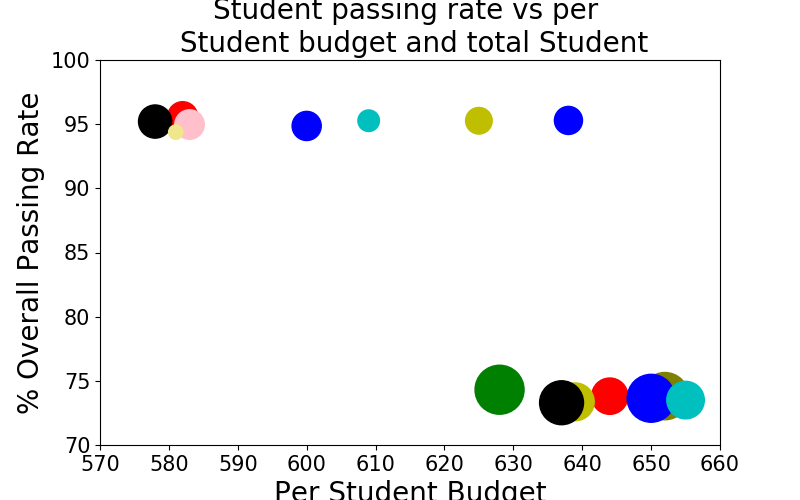

In [8]:
plt.figure(figsize =(8,5))
plt.scatter(school_summary_df["Per Student Budget"],school_summary_df["% Overall Passing Rate"], 
            s= school_summary_df["Total Student"]/4,
            c = ["r","b","c","y","k","pink","b","khaki","g","olive"])
plt.xlabel("Per Student Budget",fontsize = 20)
plt.ylabel("% Overall Passing Rate",fontsize = 20)
plt.title("Student passing rate vs per \n Student budget and total Student",fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(570,660)
plt.ylim(70,100)
plt.grid(which = "minor")
plt.show()

## Math Scores by Grade

* Create a table that lists the average Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

  * Create a pandas series for each grade. Hint: use a conditional statement.
  
  * Group each series by school
  
  * Combine the series into a dataframe
  
  * Optional: give the displayed data cleaner formatting

In [9]:
school_data_grade9 = school_data_complete[school_data_complete["grade"]=="9th"]
school_data_grade10 = school_data_complete[school_data_complete["grade"]=="10th"]
school_data_grade11 = school_data_complete[school_data_complete["grade"]=="11th"]
school_data_grade12 = school_data_complete[school_data_complete["grade"]=="12th"]

Grouped_by_schoolgrade9 = school_data_grade9.groupby(["school_name"])
Grouped_by_schoolgrade10 = school_data_grade10.groupby(["school_name"])
Grouped_by_schoolgrade11 = school_data_grade11.groupby(["school_name"])
Grouped_by_schoolgrade12 = school_data_grade12.groupby(["school_name"])



math_score_by_grade = pd.DataFrame({"9th":Grouped_by_schoolgrade9["math_score"].mean(),
                                           "10th":Grouped_by_schoolgrade10["math_score"].mean(),
                                           "11th":Grouped_by_schoolgrade11["math_score"].mean(),
                                           "12th":Grouped_by_schoolgrade12["math_score"].mean()})

math_score_by_grade.index.names=["School Name"]
math_score_by_grade


,9th,10th,11th,12th
School Name,,,,
Bailey High School,77.08,77.00,77.52,76.49
Cabrera High School,83.09,83.15,82.77,83.28
Figueroa High School,76.40,76.54,76.88,77.15
Ford High School,77.36,77.67,76.92,76.18
Griffin High School,82.04,84.23,83.84,83.36
Hernandez High School,77.44,77.34,77.14,77.19
Holden High School,83.79,83.43,85.00,82.86
Huang High School,77.03,75.91,76.45,77.23
Johnson High School,77.19,76.69,77.49,76.86


## Reading Score by Grade 

* Perform the same operations as above for reading scores

In [10]:
reading_score_by_grade = pd.DataFrame({"9th":Grouped_by_schoolgrade9["reading_score"].mean(),
                                           "10th":Grouped_by_schoolgrade10["reading_score"].mean(),
                                           "11th":Grouped_by_schoolgrade11["reading_score"].mean(),
                                           "12th":Grouped_by_schoolgrade12["reading_score"].mean()})

reading_score_by_grade.index.names=["School Name"]
reading_score_by_grade

,9th,10th,11th,12th
School Name,,,,
Bailey High School,81.30,80.91,80.95,80.91
Cabrera High School,83.68,84.25,83.79,84.29
Figueroa High School,81.20,81.41,80.64,81.38
Ford High School,80.63,81.26,80.40,80.66
Griffin High School,83.37,83.71,84.29,84.01
Hernandez High School,80.87,80.66,81.40,80.86
Holden High School,83.68,83.32,83.82,84.70
Huang High School,81.29,81.51,81.42,80.31
Johnson High School,81.26,80.77,80.62,81.23


## Scores by School Spending

* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

In [15]:
# Sample bins. Feel free to create your own bins.
spending_bins = [0, 585, 615, 645, 675]
group_names = ["<$585", "$585-615", "$615-645", "$645-675"]

# Adding "Per Student Budget" column to the basic data frame
school_data_complete1 = school_data_complete.merge(pd.DataFrame(school_summary_df["Per Student Budget"]), \
                                                  on="school_name", how="left")
# classification based on "Per Student Budget"
school_data_complete1["Budget Class"] = pd.cut(school_data_complete1["Per Student Budget"],spending_bins,labels = group_names)

# group by "Per Student Budget class"
school_data_groupby_budgetgroup = school_data_complete1.groupby("Budget Class")

# Average Math Score
school_spending_df = pd.DataFrame(school_data_groupby_budgetgroup["math_score"].mean())
school_spending_df = school_spending_df.rename(columns = {"math_score":"Average Math Score"})

# Average Reading Score
school_spending_df["Average Reading Score"] = school_data_groupby_budgetgroup["reading_score"].mean()
total_student_budget_class = school_data_groupby_budgetgroup["reading_score"].count()
#% Passing Math
school_data_passed_math1=school_data_complete1[school_data_complete1["math_score"]>=70]
school_data_passed_reading1=school_data_complete1[school_data_complete1["reading_score"]>=70]

Grouped_by_school_math_passed1 = school_data_passed_math1.groupby("Budget Class")
Grouped_by_school_reading_passed1 = school_data_passed_reading1.groupby("Budget Class")


school_spending_df["% Passing Math"]= (Grouped_by_school_math_passed1["math_score"].count()/
                                      total_student_budget_class)*100

#% Passing Reading
school_spending_df["% Passing Reading"]= (Grouped_by_school_reading_passed1["reading_score"].count()/
                                         total_student_budget_class)*100

#Overall Passing Rate (Average of the above two)
school_spending_df["% Overall Passing Rate"]= (school_spending_df["% Passing Math"] +
                                              school_spending_df["% Passing Reading"])/2

#Sorting
school_spending_df = school_spending_df.sort_values("% Overall Passing Rate", ascending=False)

school_spending_df.index.names = ["Spending Ranges (Per Student)"]
# % Passing Reading
# Overall Passing Rate (Average of the above two)
school_spending_df


,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Spending Ranges (Per Student),,,,,
<$585,83.36,83.96,93.70,96.69,95.19
$585-615,83.53,83.84,94.12,95.89,95.01
$615-645,78.06,81.43,71.40,83.61,77.51
$645-675,77.05,81.01,66.23,81.11,73.67


## Scores by School Size

* Perform the same operations as above, based on school size.

In [13]:
# Sample bins. Feel free to create your own bins.
size_bins = [0, 1000, 2000, 5000]
group_names = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

# Adding "Per Student Budget" column to the basic data frame
school_data_complete2 = school_data_complete.merge(pd.DataFrame(school_summary_df["Total Student"]), \
                                                  on="school_name", how="left")
# classification based on "Per Student Budget"
school_data_complete2["School Size"] = pd.cut(school_data_complete2["Total Student"], size_bins, labels = group_names)
# group by "Per Student Budget class"
school_data_groupby_schoolsize = school_data_complete2.groupby("School Size")
# Average Math Score
school_size_df = pd.DataFrame(school_data_groupby_schoolsize["math_score"].mean())
school_size_df = school_size_df.rename(columns = {"math_score":"Average Math Score"})

# Average Reading Score
school_size_df["Average Reading Score"] = school_data_groupby_schoolsize["reading_score"].mean()
total_student_schoolsize = school_data_groupby_schoolsize["reading_score"].count()

#% Passing Math
school_data_passed_math2=school_data_complete2[school_data_complete2["math_score"]>=70]
school_data_passed_reading2=school_data_complete2[school_data_complete2["reading_score"]>=70]

Grouped_by_school_math_passed2 = school_data_passed_math2.groupby("School Size")
Grouped_by_school_reading_passed2 = school_data_passed_reading2.groupby("School Size")

school_size_df["% Passing Math"]= (Grouped_by_school_math_passed2["math_score"].count()/
                                      total_student_schoolsize)*100

#% Passing Reading
school_size_df["% Passing Reading"]= (Grouped_by_school_reading_passed2["reading_score"].count()/
                                         total_student_schoolsize)*100

#Overall Passing Rate (Average of the above two)
school_size_df["% Overall Passing Rate"]= (school_size_df["% Passing Math"] +
                                              school_size_df["% Passing Reading"])/2

#Sorting
school_size_df = school_size_df.sort_values("% Overall Passing Rate", ascending=False)

#school_spending_df.index.names = ["S"]
# % Passing Reading
# Overall Passing Rate (Average of the above two)
school_size_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Size,,,,,
Medium (1000-2000),83.37,83.87,93.62,96.77,95.19
Small (<1000),83.83,83.97,93.95,96.04,95.00
Large (2000-5000),77.48,81.20,68.65,82.13,75.39


## Scores by School Type

* Perform the same operations as above, based on school type.

In [14]:
school_data_groupby_schooltype = school_data_complete.groupby("type")
school_type_df = pd.DataFrame(school_data_groupby_schooltype["math_score"].mean())
school_type_df = school_type_df.rename(columns = {"math_score":"Average Math Score"})
school_type_df["Average Reading Score"] = school_data_groupby_schooltype["reading_score"].mean()


passed_math = school_data_complete[school_data_complete["math_score"]>=70]
passed_reading = school_data_complete[school_data_complete["reading_score"]>=70]

passed_math_groupby_schooltype = passed_math.groupby("type")
passed_reading_groupby_schooltype = passed_reading.groupby("type")

school_type_df["% Passing Math"] = (passed_math_groupby_schooltype["math_score"].count()/
                                    school_data_groupby_schooltype["math_score"].count())*100

school_type_df["% Passing Reading"] = (passed_reading_groupby_schooltype["reading_score"].count()/
                                    school_data_groupby_schooltype["reading_score"].count())*100

school_type_df["% Overall Passing Rate"] = (school_type_df["% Passing Math"] +
                                            school_type_df["% Passing Reading"])/2

school_type_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
type,,,,,
Charter,83.41,83.90,93.70,96.65,95.17
District,76.99,80.96,66.52,80.91,73.71
